# Housing Sales in King County, Washington ¶

## Introduction
This dataset focuses on housing prices in King County, WA, which includes primarily urban and suburban areas. I explored the data through visualization and cleaning before building a linear regression model for analysis. Utilizing Python packages, I aimed to clarify the complex factors influencing housing prices. This project addresses the confusion that potential buyers, realtors, and builders face in the diverse housing market, offering data-driven insights into the key elements affecting prices in King County during 2014-15.

## 1. Data Exploration

We first import the necessary libraries to conduct our analysis. 


In [38]:
# In this case we are going to import pandas, numpy, scipy, random and matplotlib.pyplot.....
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [39]:
# Source and load the dataset.
Dataset = pd.read_csv('kc_house_data.csv')  

# Using the head() pandas method, observe the first five entries.
Dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
# Get more information on the type of variables in the dataset and the number of non-null entries.
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1.2. Describing the preliminary data
Descriptive statistics such as mean, standard deviation, minimum, and maximum values are obtained using the "include='all'" method to gather data on both categorical and numerical variables.

In [41]:
# Viewing the descriptive statistics of the dataset
Dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Next, we check for any missing values and calculate their sums. Addressing missing values is crucial for creating an accurate model. 

In [42]:
# Checking the sum of any missing values
Dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [43]:
# Replace missing values in 'bedrooms' and 'bathrooms' with their respective means
Dataset['bedrooms'].fillna(Dataset['bedrooms'].mean(), inplace=True)
Dataset['bathrooms'].fillna(Dataset['bathrooms'].mean(), inplace=True)

In [44]:
# Convert date string to datetime object
Dataset['date'] = pd.to_datetime(Dataset['date'])

# Optional:Extract month or year for future analysis
Dataset['month_sold'] = Dataset['date'].dt.month

The price will serve as the dependent variable, influenced by other factors such as the number of bedrooms, bathrooms, condition, grade, waterfront access, etc. 

In [45]:
# Remove the clear error: house with 33 bedrooms
Dataset = Dataset[Dataset['bedrooms'] != 33]

# Remove price outliers using Z-score (removes values > 3 standard deviations away)
from scipy import stats
Dataset = Dataset[(np.abs(stats.zscore(Dataset['price'])) < 3)]

In [46]:
# View summary statistics to ensure outliers are handled
Dataset.describe()

# Check current dimensions
print(f"Final dataset shape: {Dataset.shape}")

Final dataset shape: (21206, 22)


For the final project, these variables are explored in greater detail in the supporting documentation. We drop the columns 'id' and 'date' as they do not provide relevant information about the price.

In [47]:
# We drop the columns 'id' and 'date' since they don't give us much information about the price.
Dataset = Dataset.drop(['id', 'date'], axis=1, errors='ignore')
Dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


### 1.3. Correaltion Matrix

A heatmap is employed to determine the correlation between the variables in this dataset. This heatmap will be a key resource in the Data Visualization section.

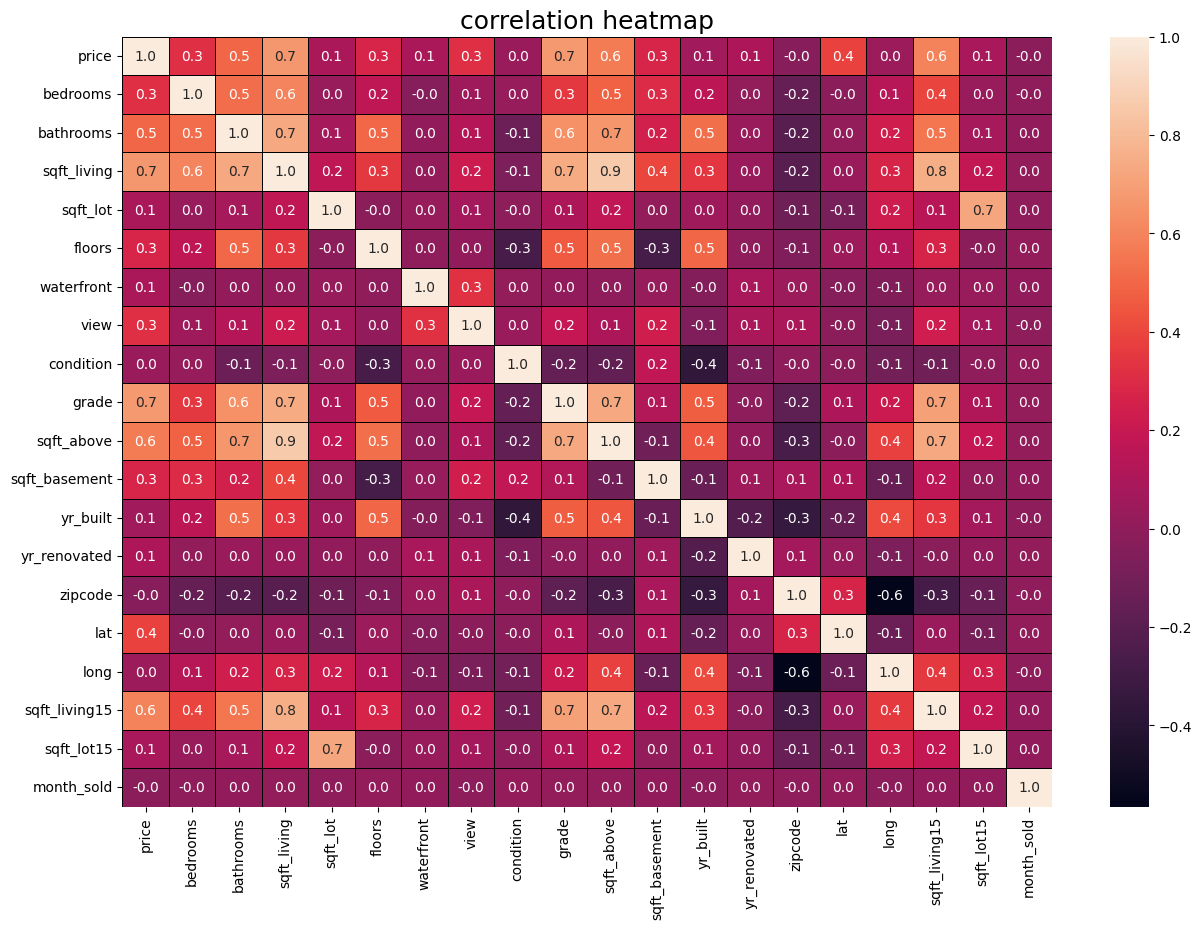

In [48]:
# Change the size of the figure using this matplotlib me.thod
plt.subplots(figsize=(15, 10))

# Plot a correalation heatmap using seaborn. Border the squares with black color, show the correaltion index and round it up.
sns.heatmap(Dataset.corr(), annot = True, linewidths=.5, linecolor='black', fmt = '1.1f')

# Titling the heatmap
plt.title('correlation heatmap', size=18)
plt.show()

## 2. Data Visualization
In this section, we focus all visualizations and their analyses around the dependent variable, price. The dataset, which encompasses a mix of urban and suburban locations, contains many outliers or exceptions. While we cannot fully explain these outliers due to the disparity in housing prices across various neighborhoods, we can begin to reason their existence by examining the correlations.

### 2.1. Relationship between price and the number of bedrooms, bathrooms and floors:
To provide a quick overview, we use the pairplot method from Seaborn, which examines pairwise relationships among different variable subsets of the dataset. It appears that the number of bedrooms, bathrooms, and floors has a positive correlation with price and with each other. This aligns with common intuition; generally, more bedrooms, bathrooms, or floors indicate larger, more expensive homes. However, caution is warranted, as many outliers require careful consideration on a case-by-case basis.

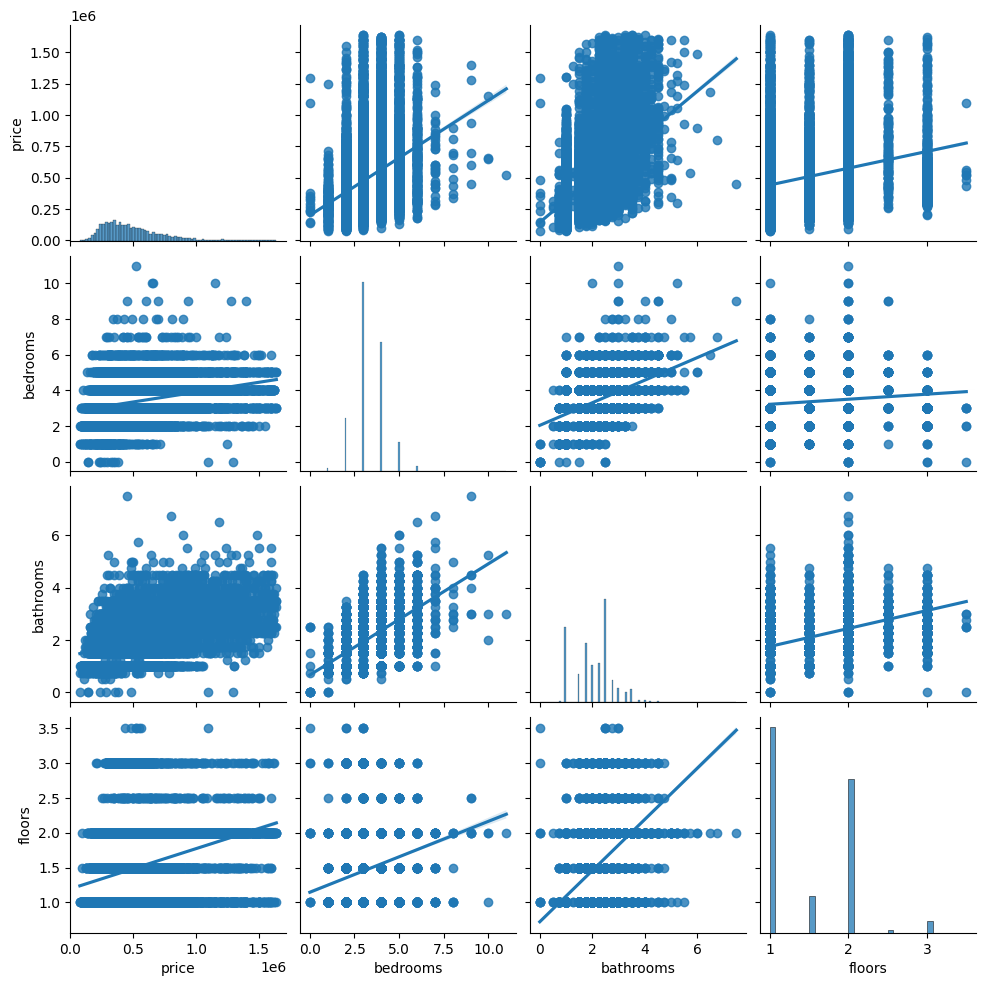

In [49]:
# We use this in-built seaborn method to plot the specified variables and display regression lines to summarize the trends.
sns.pairplot(Dataset, vars = ["price","bedrooms","bathrooms","floors"], kind ="reg")

### 2.2. Number of Bedrooms and Price
We analyze the unique entries in the number of bedrooms column. 

In [50]:
# Pandas method to obtain the unique values of this variable to understand which values have been taken.
Dataset['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  0,  7,  8,  9, 11, 10])

Since the number of bedrooms is a discrete variable, a boxplot is appropriate for visualizing the data. A box plot (or box-and-whisker plot) displays the distribution of quantitative data, allowing for comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset, while the whiskers extend to show the rest of the distribution, excluding outliers as determined by the interquartile range

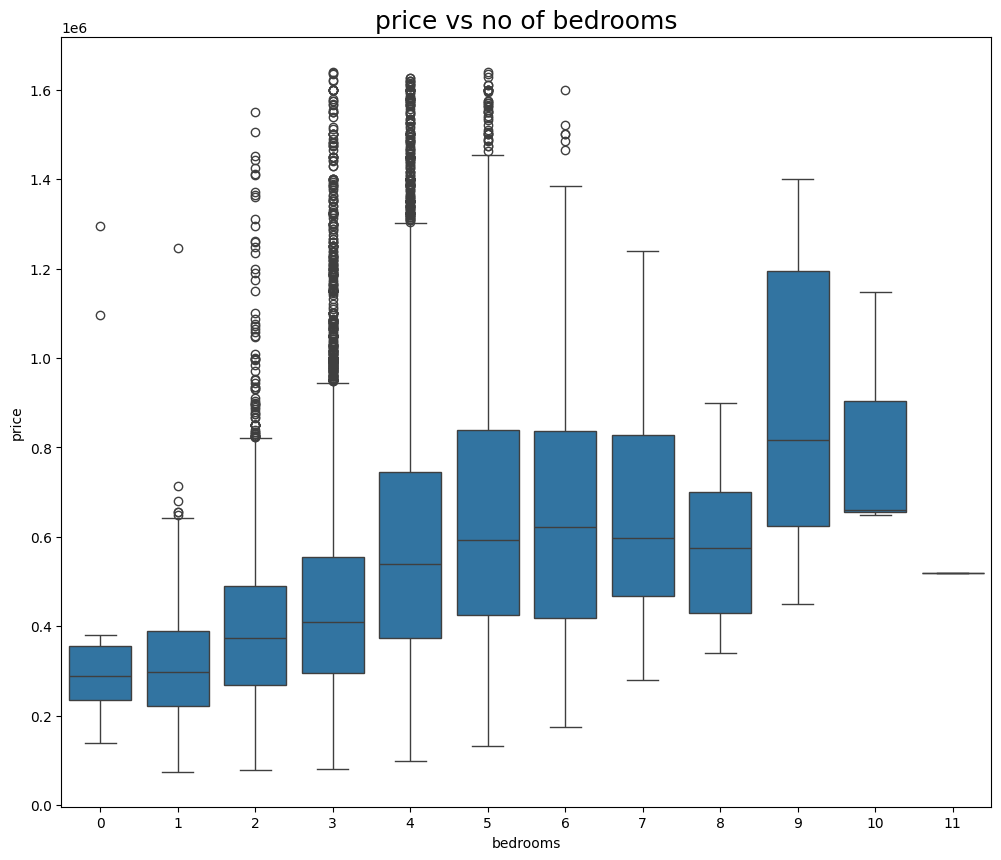

In [51]:
plt.subplots(figsize=(12, 10))

# Seaborn method to plot a boxplot using the specified variables from the dataset.
sns.boxplot(x="bedrooms", y = "price", data= Dataset)

plt.title('price vs no of bedrooms', size=18)
plt.show()

Most houses typically feature 3 to 4 bedrooms. The horizontal line within the boxes represents the median price, while the lower and upper halves denote the 25th and 75th percentiles, respectively. Outliers are represented as individual points beyond the typical range. Interestingly, there are numerous outliers; for instance, a house with no bedrooms might be a studio apartment, and there is one with 33 bedrooms, surprisingly priced modestly compared to other houses. 

For any given number of bedrooms, many outliers exist outside the expected range. This discrepancy could be attributed to certain houses in the Greater Seattle Area being more expensive than suburban houses with a higher number of bedrooms. Therefore, the number of bedrooms alone cannot explain price; we need to also consider zipcode, size, and other variables.

### 2.3. Number of Bathrooms and Price
The distribution of the number of bathrooms seems continuous; thus, a histogram is suitable for visualization. Similar to the previous analysis, the price varies significantly among houses with different numbers of bathrooms. While one might assume an increasing trend in price with more bathrooms, the dataset originates from both urban and suburban regions, making exceptions inevitable.

In [52]:
# Viewing the unique values in the 'bathrooms' column
Dataset['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 4.25, 3.75, 5.  , 0.  , 1.25, 0.5 , 5.5 , 5.25,
       6.75, 7.5 , 5.75, 6.5 , 6.  ])

The number of bathrooms seems to follow a continuous distribution. A histogram would be an ideal option to denote it.

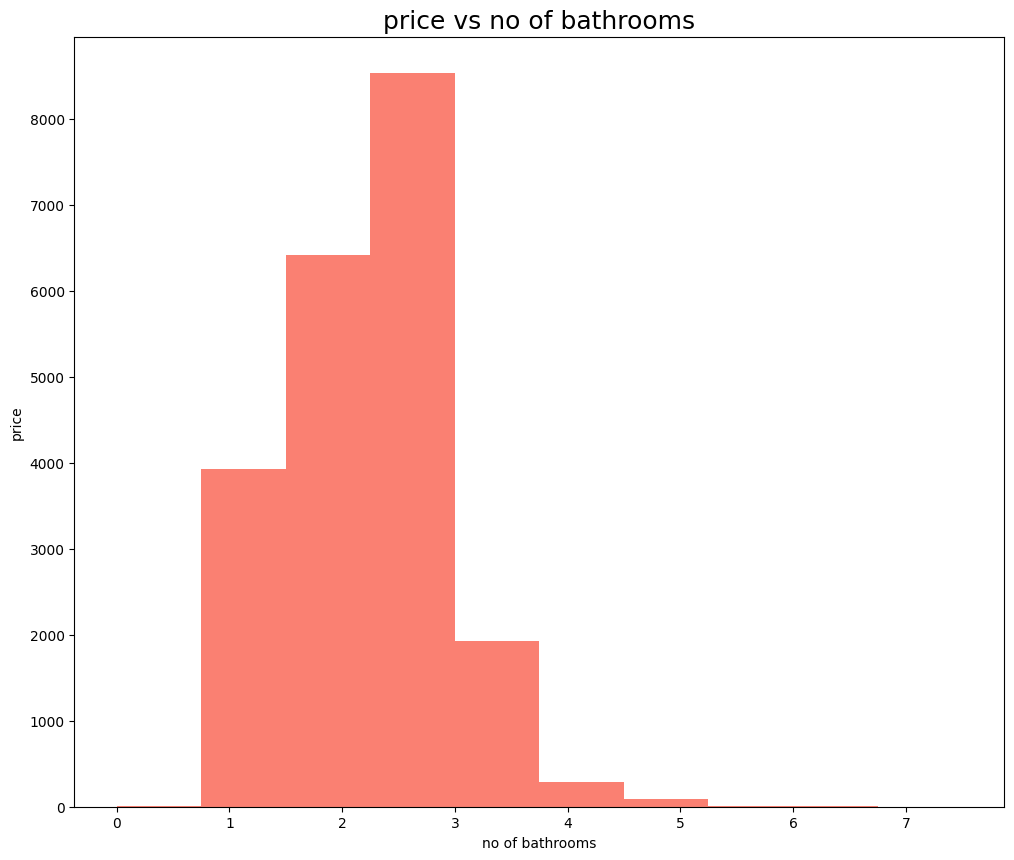

In [53]:
# Viewing the distribution of the 'bathrooms' column    
plt.subplots(figsize=(12, 10))

#The underscore is a dummy variable used for making it 2D.
_=plt.hist(Dataset['bathrooms'], color='salmon')
_=plt.xlabel('no of bathrooms')
_=plt.ylabel('price')

plt.title('price vs no of bathrooms', size=18)
plt.show()

### 2.4. Number of Floors and Price
Given the distribution of this variable, a bar graph effectively visualizes the relationship between the number of floors and price. Although there is a positive correlation between the two variables, an obvious trend is not apparent. For instance, penthouses and loft apartments in downtown Seattle may be significantly more expensive than three-story suburban colonials.

In [54]:
# Viewing the unique values in the 'floors' column
Dataset['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

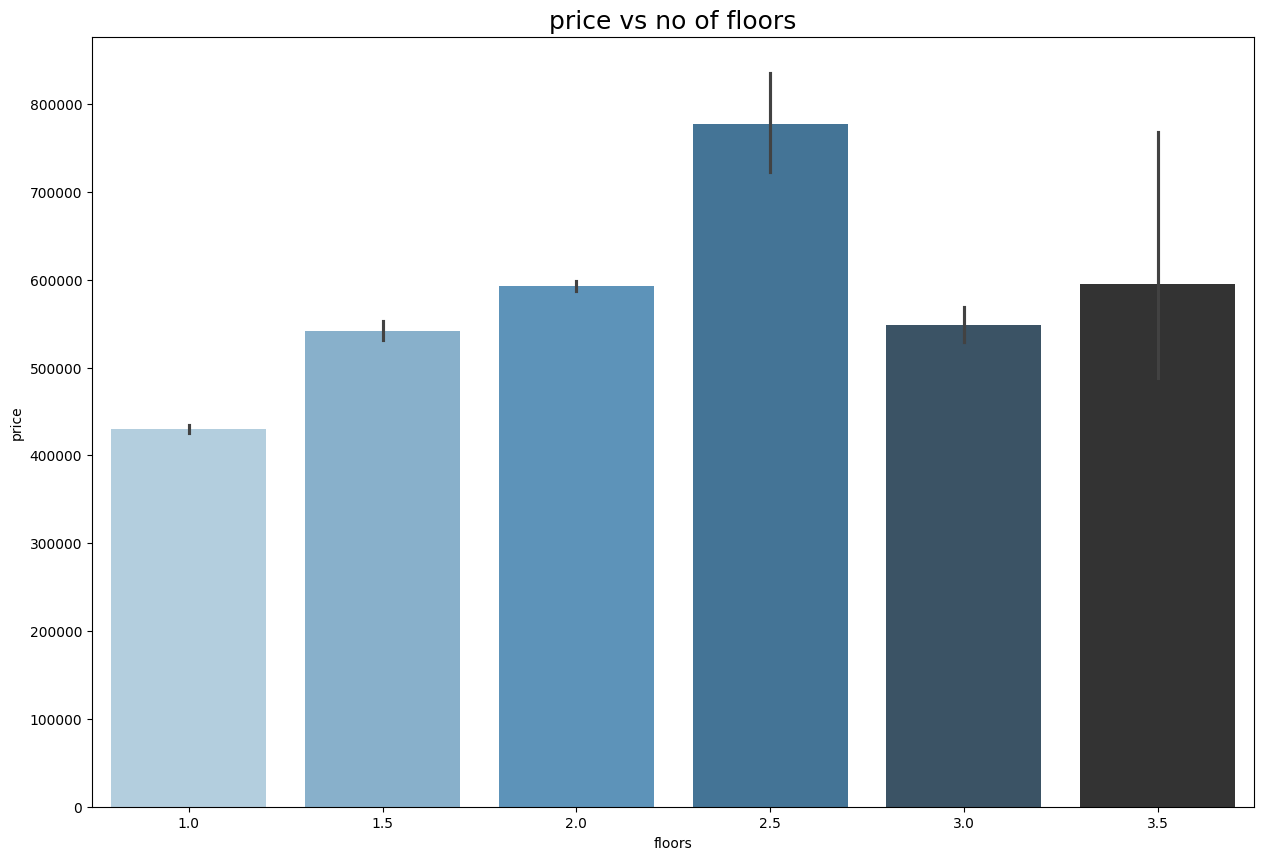

In [55]:
# Viewing the distribution of the 'floors' column    
plt.subplots(figsize=(15, 10))

# Seaborn method for plotting a bargraph.
sns.barplot(x="floors", y="price", data=Dataset, hue="floors", palette="Blues_d", legend=False)

plt.title('price vs no of floors', size=18)
plt.show()

Although there is a positive correlation between the two variables, an obvious trend is not apparent. For instance, penthouses and loft apartments in downtown Seattle may be significantly more expensive than three-story suburban colonials.


### 2.5. Living Area, Waterfront, View and Price¶

Given the number of variables involved,a relplot is the best option to explore these variables. This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets.The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters.
We note that the waterfront has already been converted into a dummy variable by mapping no waterfront and a waterfront with 0 and 1 respectively. THe view just tells us how good the view of the waterfront is, if any, on a scale of 0 to 4.

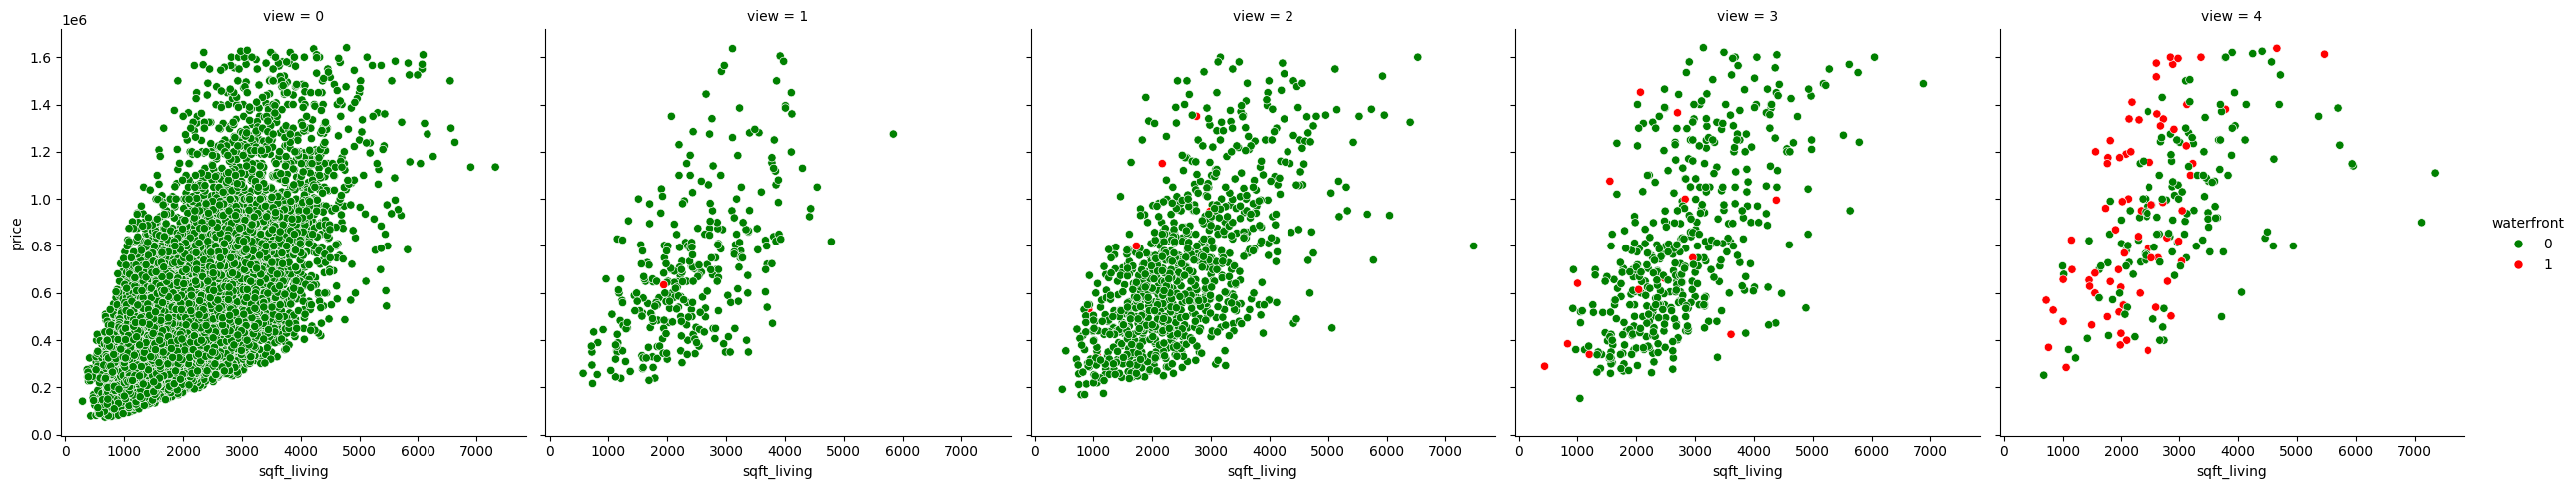

In [56]:
# Seaborn method for a 'relpot':view acts as a further breakdown dimension. We change the look of the graph by using another color pallate.
sns.relplot(x="sqft_living", y="price", hue="waterfront", col="view", palette=["g", "r"], data=Dataset)

As evident from the graphs above, a house with a good view of the waterfront definitely costs more on an average. There is one house which doesn't have as good as a view but still costs more.
As expected, the presence of a waterfront is not game-changing because a lot of houses with no such views still continue to priced similarly.
But for houses with a similar living area, a very good view of the waterfront shoots the price up (See graph no 4 ).

### 2.6. Living Area, Lot Size, Living Area and Lot Size in the Proximity and Price

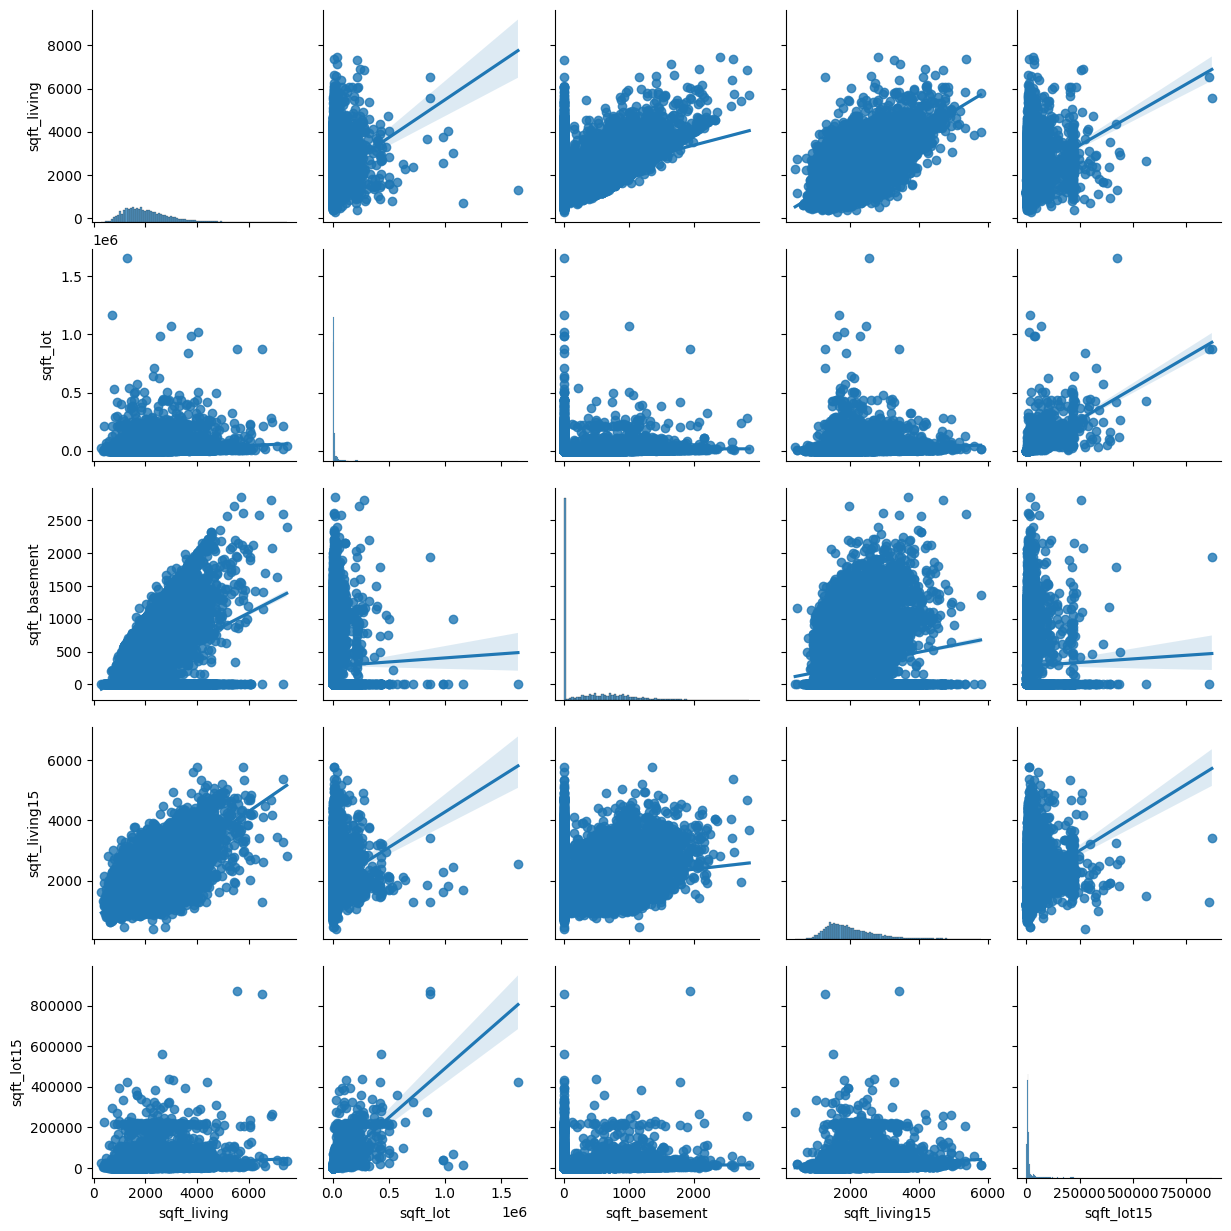

In [57]:
# We use this in-built seaborn method to plot the specified variables and display regression lines to summarize the trends.
sns.pairplot(Dataset, vars = ["sqft_living", "sqft_lot", "sqft_basement", "sqft_living15","sqft_lot15"], kind ="reg")

There is a lot of correalation between the living area('sqft_living') and the other variables like the size of the lot('sqft_lot'), basement('sqft_basement') and the living area and plot size of the nearest 15 houses ('sqft_living15' and 'sqft_lot15' respectively).
A large living area would definitely mean more room for basement and a larger lot. As evident from the correlation heatmap, a larger living area is also strongly correlated with the number of bedrooms, bathrooms and floors.
Houses that are close to each other are similar in area and similarly priced(refer the heatmap).This can be attributed to the clustering of similar houses into a neighborhood. More affluent neighborhoods will also have similar prices. There aren't as many exceptions in this case.

### 2.7. Grade and Price

This tells us how the grade, that is the quality of construction materials used might affet price.

In [58]:
# Viewing the unique values in the 'grade' column
Dataset['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10,  4, 12,  3,  1])

Given the kind of distribution, using a boxplot makes sense.

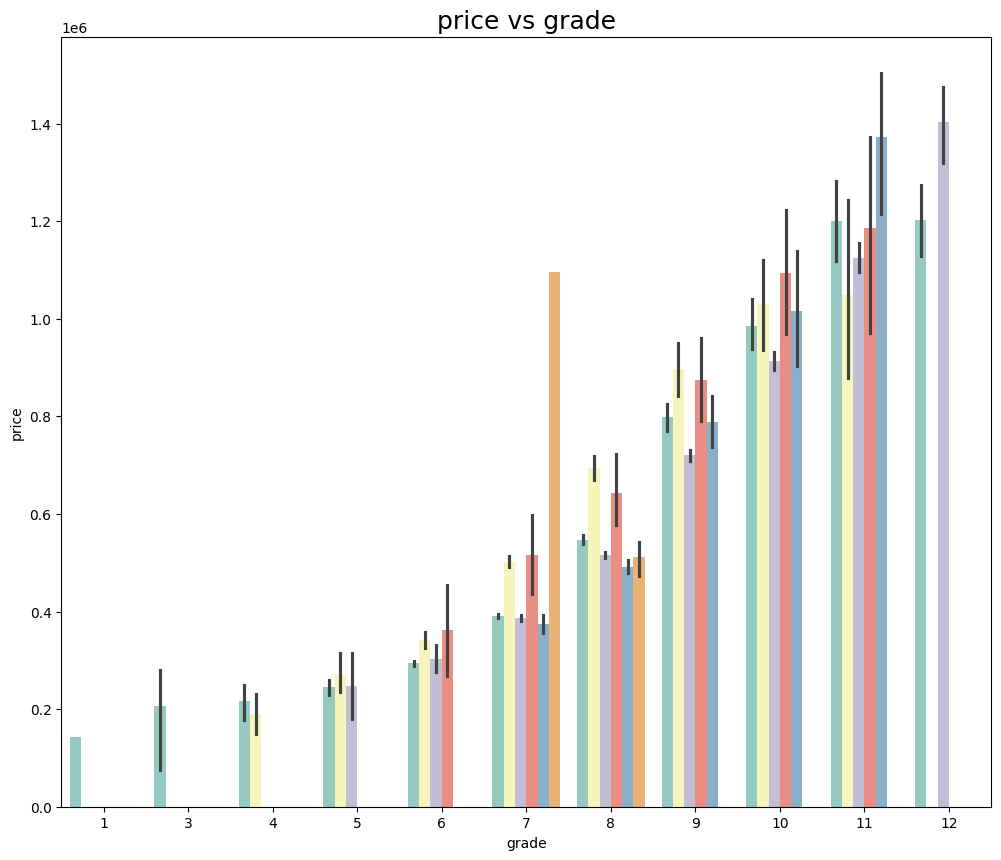

In [59]:
# We use this in-built seaborn method to plot the specified variables and display regression lines to summarize the trends.
plt.subplots(figsize=(12, 10))

sns.barplot(x="grade", y="price", data=Dataset, hue="floors", palette="Set3", legend=False)

plt.title('price vs grade', size=18)
plt.show()

It is easy to see an obvious upward trend in the graph. Better construction materials increase and the cost of labor and raw materials which is refected by the price. Although we can't deny some exceptions, they definitely aren't as deviant as some of the variables that we have seen earlier.

### 2.8. Condition and Price

This variable explores how good or bad the condition of the house is on a scale of 1 to 5.

In [60]:
# Viewing the unique values in the 'condition' column
Dataset['condition'].unique()

array([3, 5, 4, 1, 2])

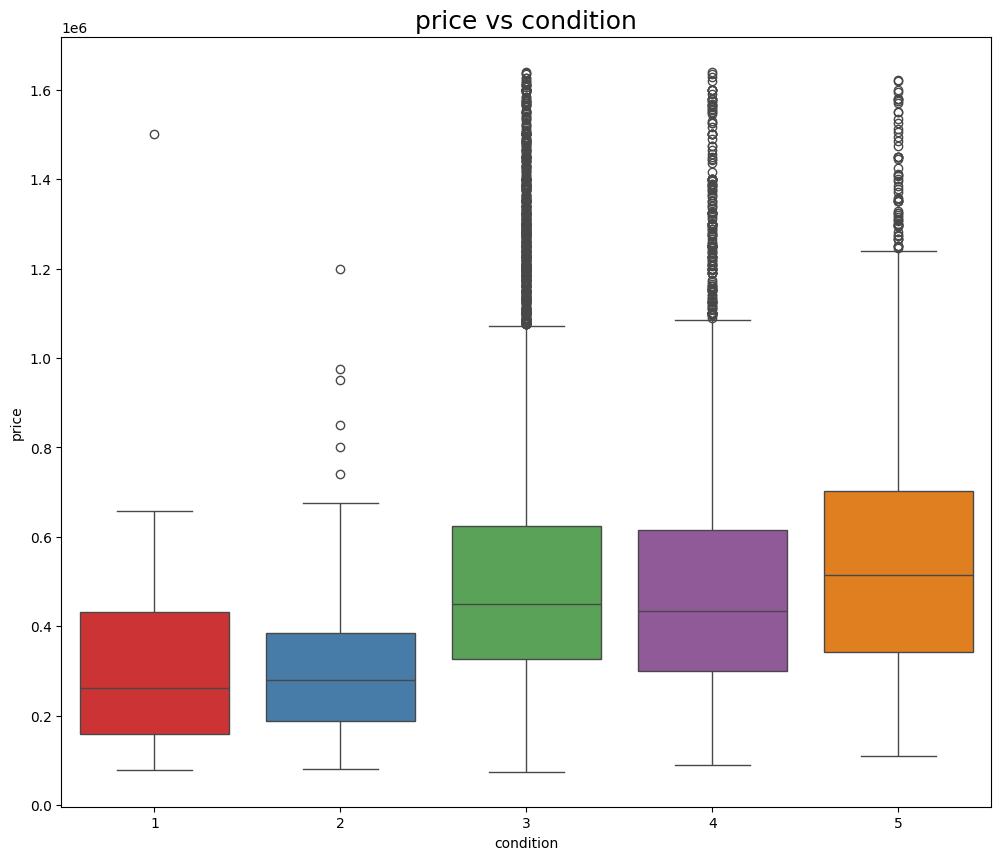

In [61]:
# Viewing the distribution of the 'condition' column
plt.subplots(figsize=(12, 10))

sns.boxplot(x="condition", y="price", data=Dataset, palette="Set1", hue="condition",  legend=False)

plt.title('price vs condition', size=18)
plt.show()

We observe that a better condition doesn't necessarily imply a higher price. Again it would be to broad to generalize anything given the number of outliers. It is interesting to note that houses in a mediocre condition(grade=3) have a lot of outliers. It is an intersting point for further exploration by the concerned users.

### 2.9. Grade, Condition and Price

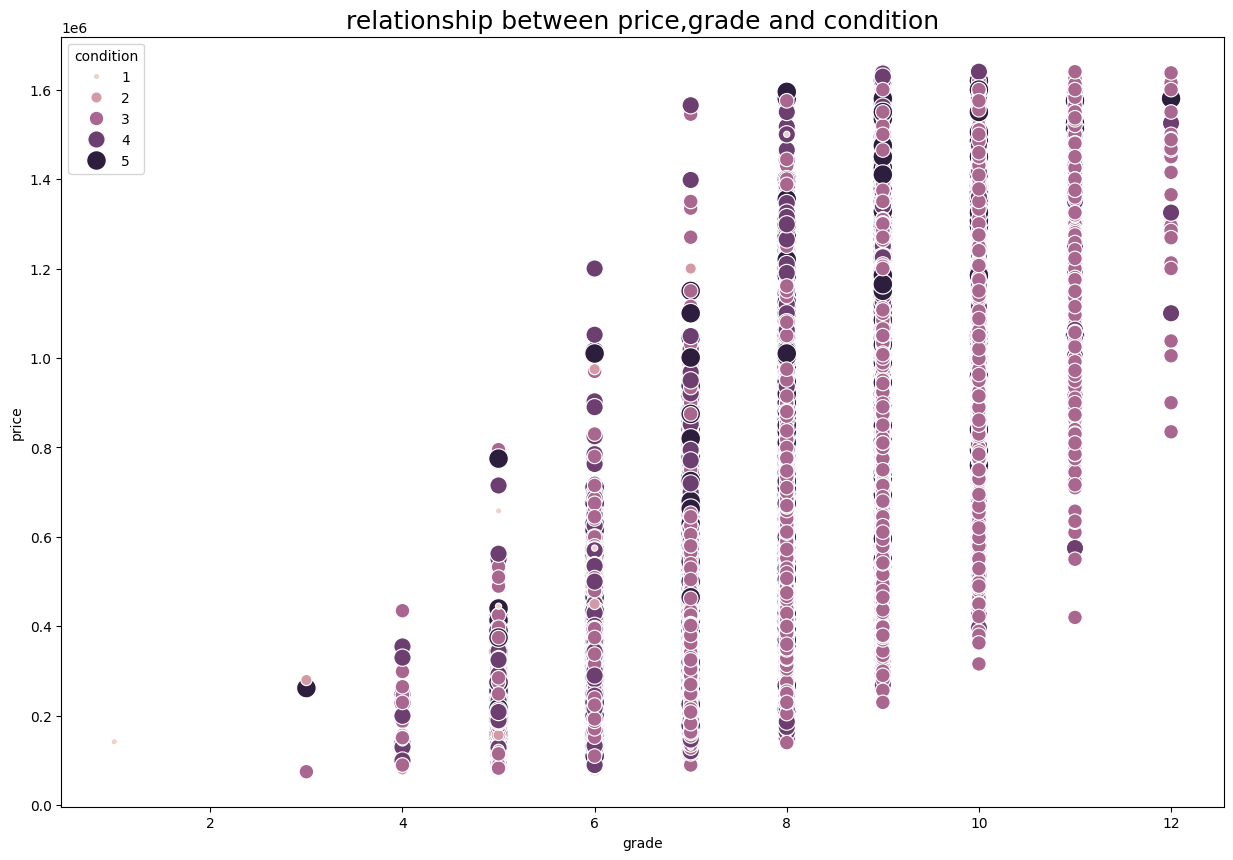

In [62]:
plt.subplots(figsize=(15, 10))

# We use a scatterplot to analyze the relationship between price and grade and further break it down using condition.
sns.scatterplot(x="grade", y="price", hue="condition", size="condition", sizes=(20, 200), data=Dataset)

plt.title('relationship between price,grade and condition', size=18)
plt.show()

It is pretty interesting to note that although better grade of materials used demands a higher price, it doesn't necessarily mean that the house is any better condition.
On an average, houses that were constructed using quality materials as are in a similar condition as their counterparts built with mediocre materials.
However is that houses in an excellent condition(condition=6) were mainly built using the best grade materials(12 or 13).
Again, we have to keep in mind that other variables like the year in which the house was built and the fact that it was renovated or not might play a role.
A quick look at the heatmap does indicate a negative correalation between condition of the house and the year in which it was built. There is however, no such correlation between condtion and renovation.
Some other variables like maintenance and deterioration due to weather conditions might have a hand. These are out of our scope though for the given dataset.

### 2.10. Year Built

This gives us an overview of the years in which the first 50 houses were built.

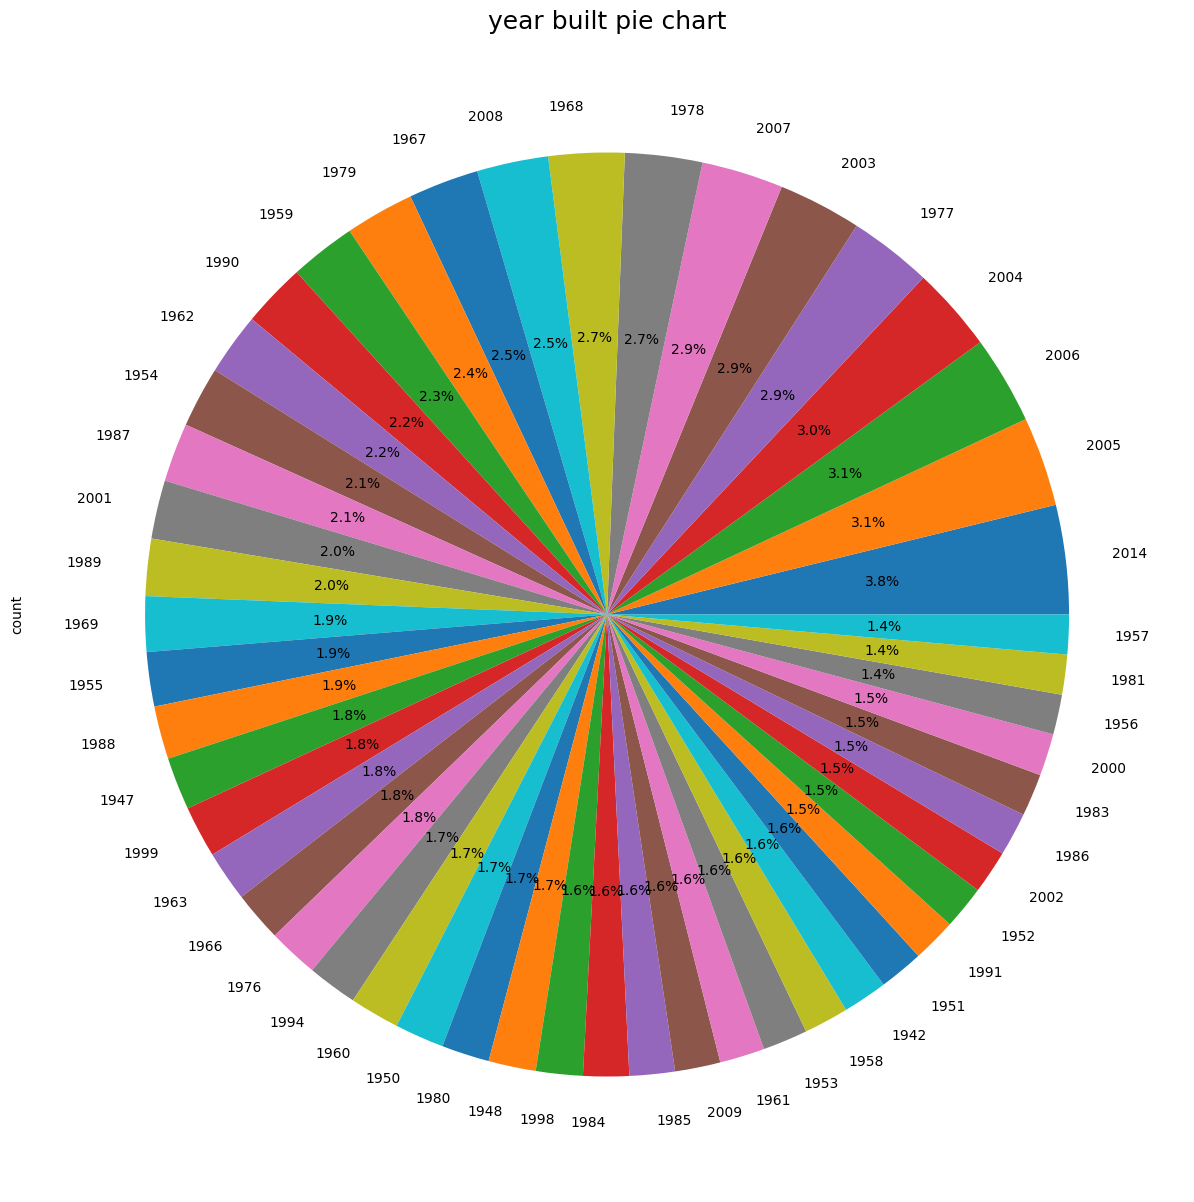

In [63]:
plt.subplots(figsize=(15, 15))

# This matplotlib method gives us the distribution of the counts of the first 50 observations and the year in which they were built. 
# The argument passed in displays the percentage up to the first decimal place.
Dataset.yr_built.value_counts().head(50).plot.pie(autopct='%1.1f%%')

plt.title('year built pie chart', size=18)
plt.show()

In [64]:
# Display the counts of houses built in each year
Dataset.yr_built.value_counts()

yr_built
2014    541
2005    444
2006    437
2004    421
1977    413
       ... 
1901     29
1902     26
1933     25
1935     23
1934     20
Name: count, Length: 116, dtype: int64

A lot of houses were built in the 2000s and 2010s.

A quick representation of the count of unique values confirms the fact.

### 2.11. Location
We plot the latitude and longitude coordinates given in the dataset. The axes range from negative to positive values because of how directions are plotted on a graph.

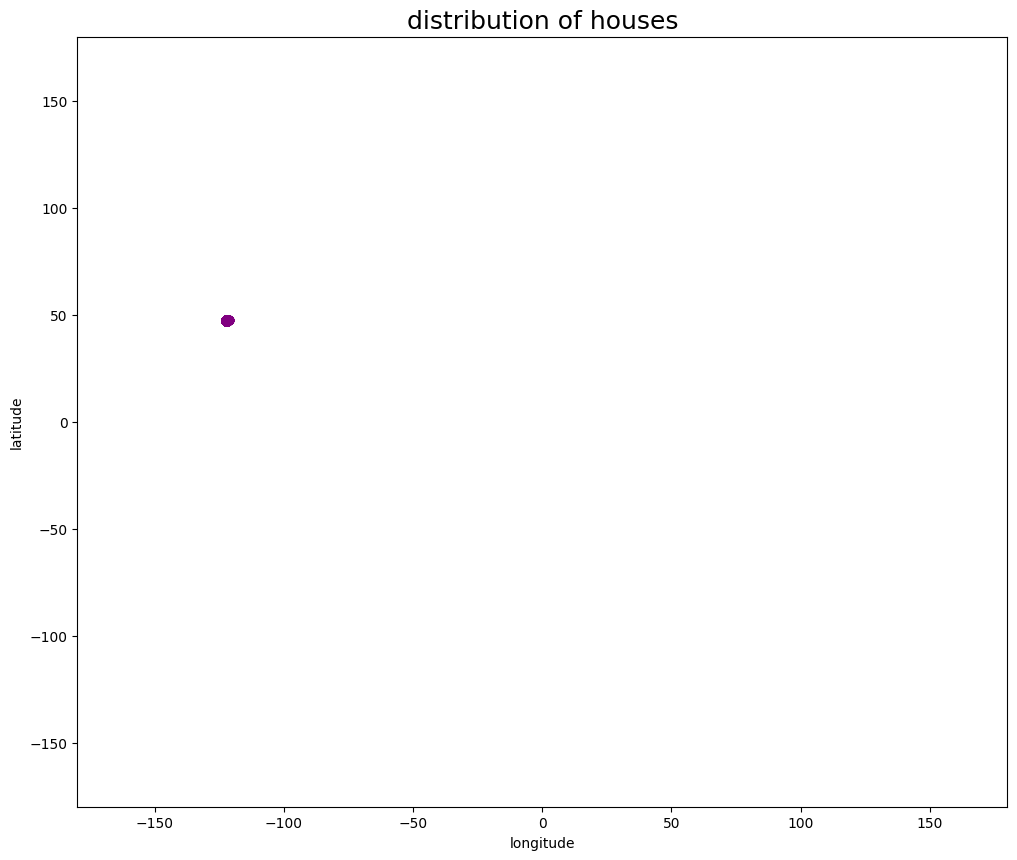

In [65]:
# We use a scatterplot to analyze the relationship between the longitude and latitude of the houses in the dataset.
plt.subplots(figsize=(12, 10))

plt.scatter(Dataset['long'], Dataset['lat'], color="purple")

# We set the limits according to the cartographical convention.
plt.xlim(-180, 180)
plt.ylim(-180, 180)

plt.xlabel('longitude')
plt.ylabel('latitude')

plt.title('distribution of houses', size=18)
plt.show()

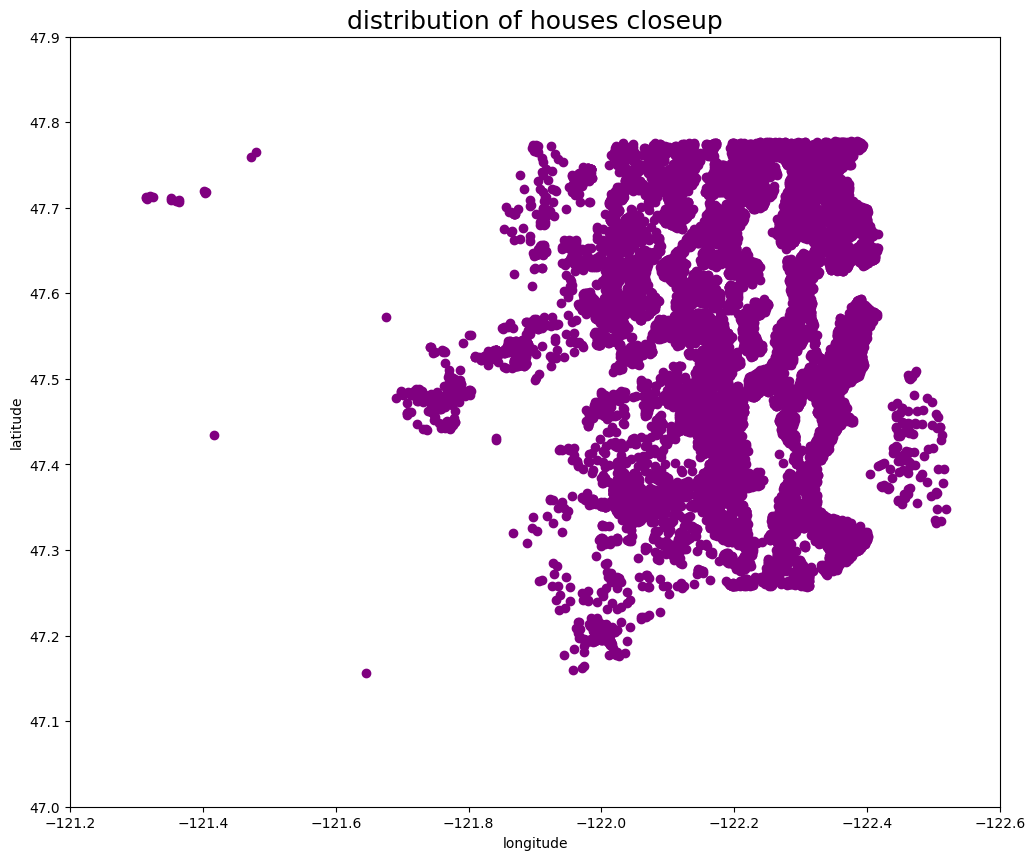

In [66]:
# We zoom in for a better picture.

plt.subplots(figsize=(12,10))

plt.scatter(Dataset['long'], Dataset['lat'], color="purple")

# Note that the coordinates have been selected based on the output of the previous scatterplot and hence won't be 100% accurate.
plt.xlim(-121.2,-122.6)
plt.ylim(47,47.9)

plt.xlabel('longitude')
plt.ylabel('latitude')

plt.title('distribution of houses closeup', size = 18)
plt.show()

This yield a very interesting result. Majority of the houses are located in the Greater Seattle Region.
More location details can be found out by plugging in the values of the longitude and the latitude in online calculators such as this one

### 2.12. Living Area and Price

The most important relationship would perhaps be this one. This forms the basis of our next few sections.

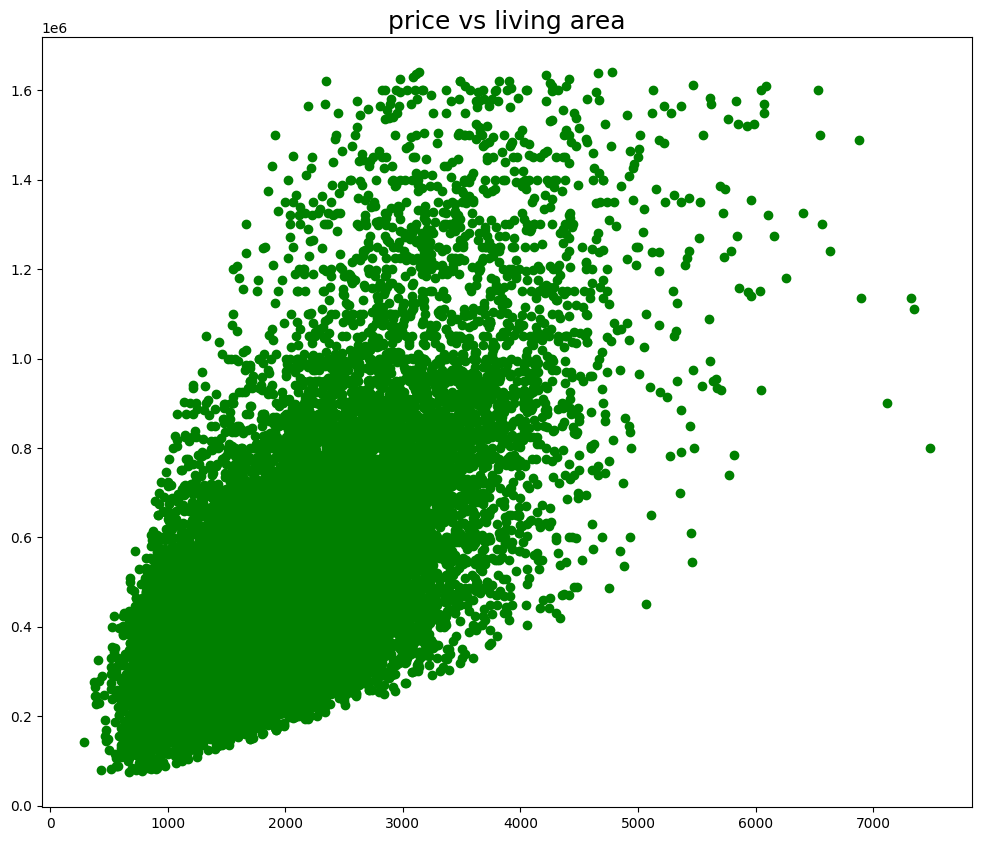

In [67]:
# We use a scatterplot to analyze the relationship between price and living area.
plt.subplots(figsize=(12, 10))

y=Dataset['price']
x=Dataset['sqft_living']

plt.scatter(x, y, color='green')

plt.title('price vs living area', size=18)
plt.show()

We see an exponential type of relationship. We will analyze it after dealing with outliers.

## 3. Dealing with Outliers

We draw the probability density functions of some variables to understand the concentration and distribution of the variable. We can also see the distribuiton of outliers and remove them.

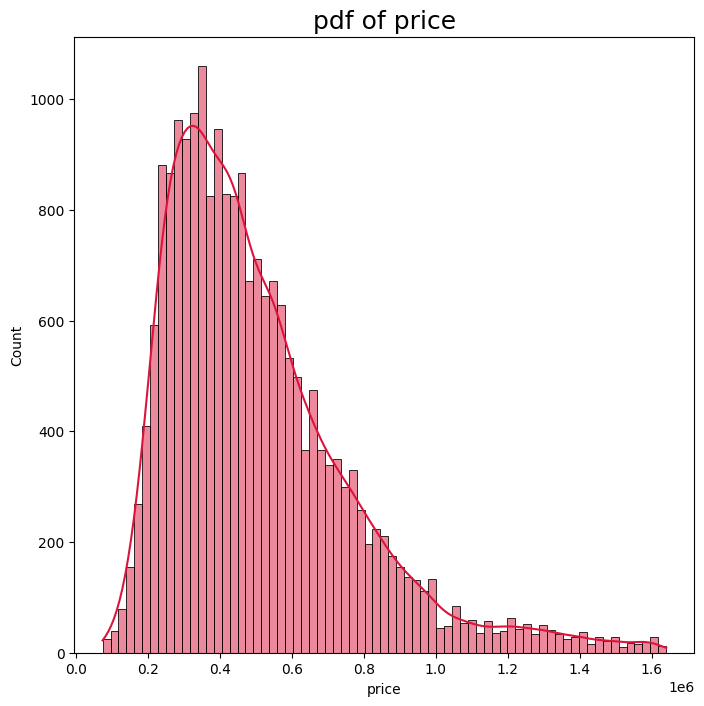

In [68]:
plt.subplots(figsize=(8, 8))

# This in-built seaborn method plots the necessary graph.
sns.histplot(Dataset['price'], color='crimson', kde=True)

plt.title('pdf of price', size = 18)
plt.show()

We drop the 99th percentile since most of them are exceptions.

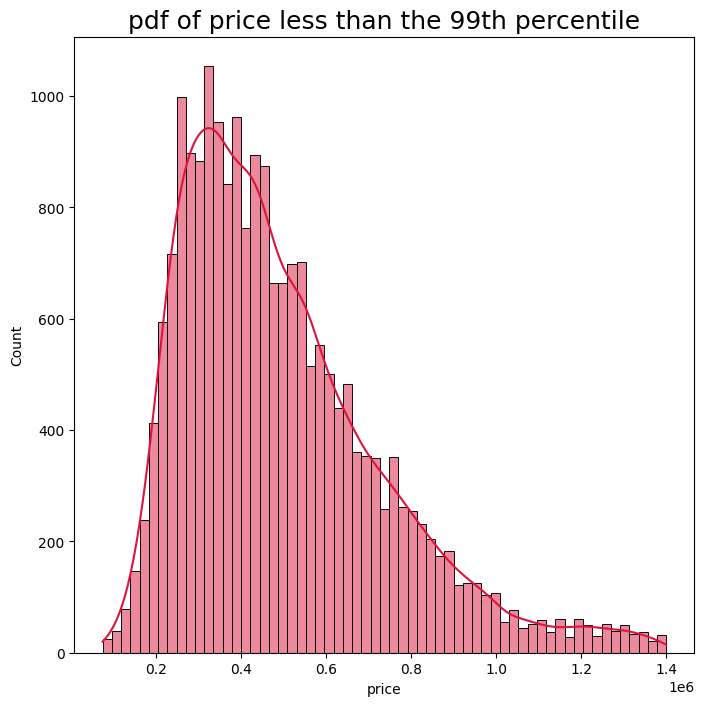

In [69]:
plt.subplots(figsize=(8,8))

# We create a new variable to contain the observations in the 99th percentile, that is the most dramatic outliers.
q = Dataset['price'].quantile(0.99)

# We store it in a new data frame that contains all the observations except for the top 1 percentile. They would normally represent some luxury houses.
data_1 = Dataset[Dataset['price']<q]
data_1.describe(include = "all")

sns.histplot(data_1['price'], color='crimson', kde=True)

plt.title('pdf of price less than the 99th percentile', size=18)
plt.show()

While still there are many outliers, as against the previous case, they are far fewer.Getting rid of all the outliers at the same time will make our model incapable of explaining exceptions altogether and paint an inaccurate and biased image of housing prices.
We identify some variables with the most significant number of outlier from our previous analyses and drop the 99th percentile. Every time we remove the outliers of a particular variable, we create a new dataframe with updated values.

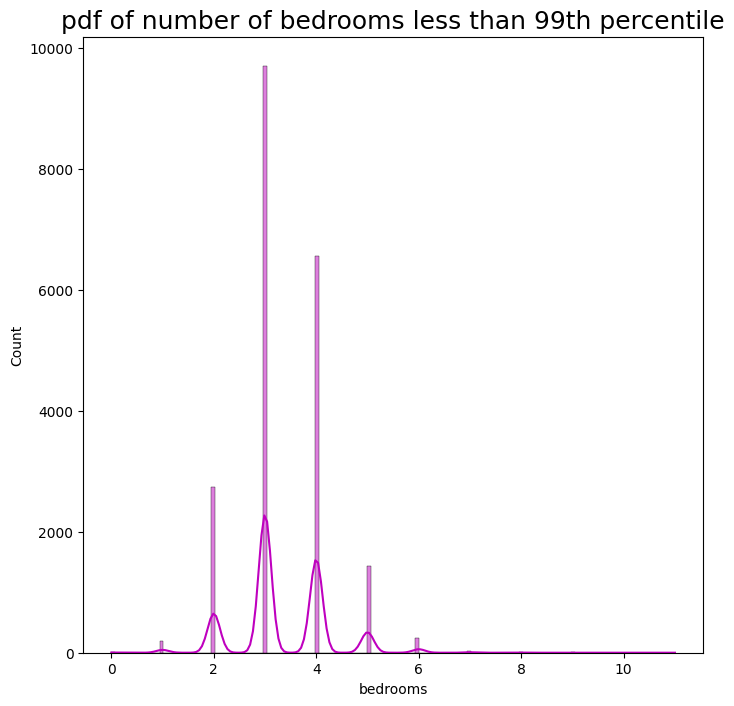

In [70]:
# We use a histogram to analyze the distribution of the number of bedrooms for the observations in the 99th percentile.
plt.subplots(figsize=(8, 8))

sns.histplot(data_1['bedrooms'], color='m', kde=True)

plt.title('pdf of number of bedrooms less than 99th percentile', size=18)
plt.show()

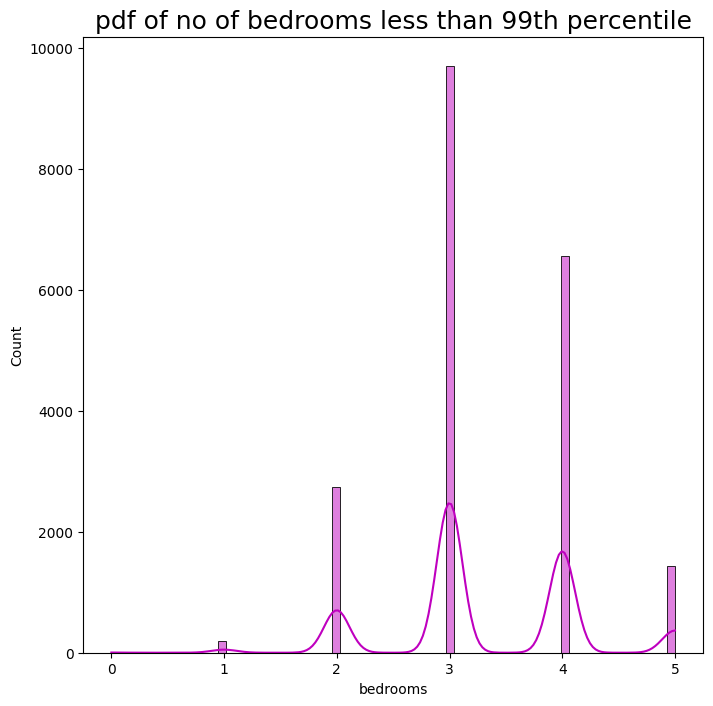

In [71]:
# We create a new variable to contain the observations in the 99th percentile, that is the most dramatic outliers.
plt.subplots(figsize=(8, 8))

p = data_1['bedrooms'].quantile(0.99)
data_2 = data_1[data_1['bedrooms']<p]
 
sns.histplot(data_2['bedrooms'], color='m', kde=True)

plt.title('pdf of no of bedrooms less than 99th percentile', size=18)
plt.show()

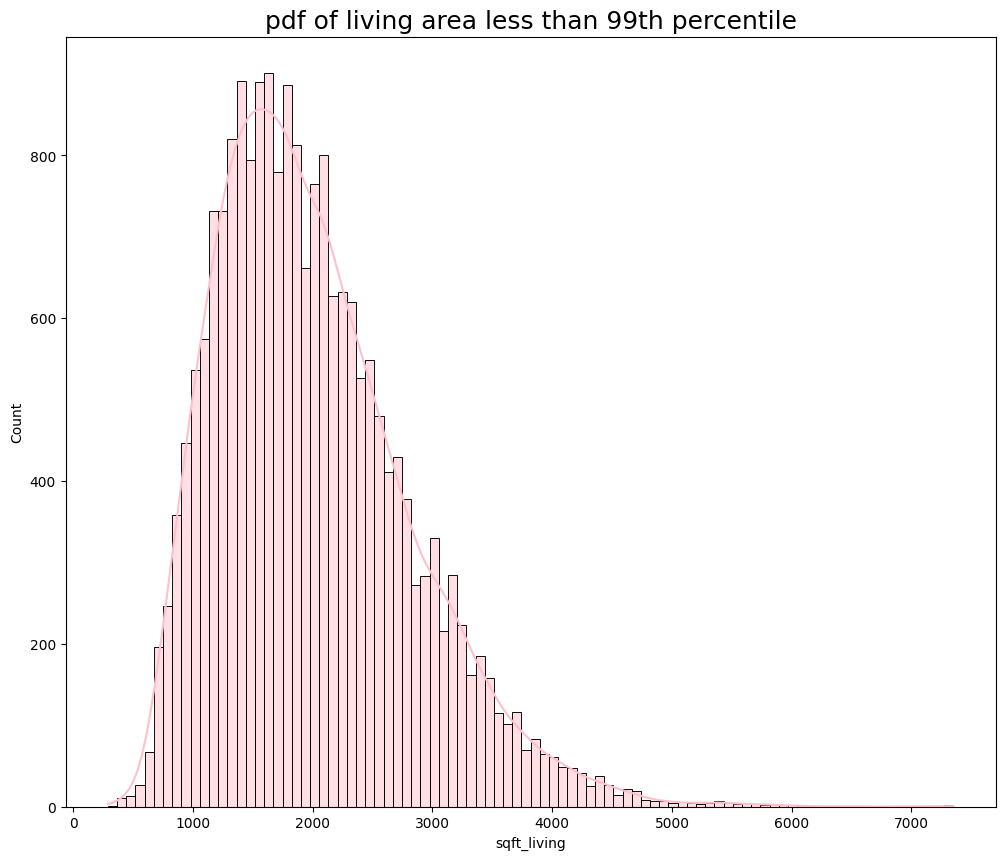

In [72]:
# We use a histogram to analyze the distribution of living area for the observations in the 99th percentile.
plt.subplots(figsize=(12,10))

sns.histplot(data_2['sqft_living'], color='pink', kde=True)

plt.title('pdf of living area less than 99th percentile', size=18)
plt.show()

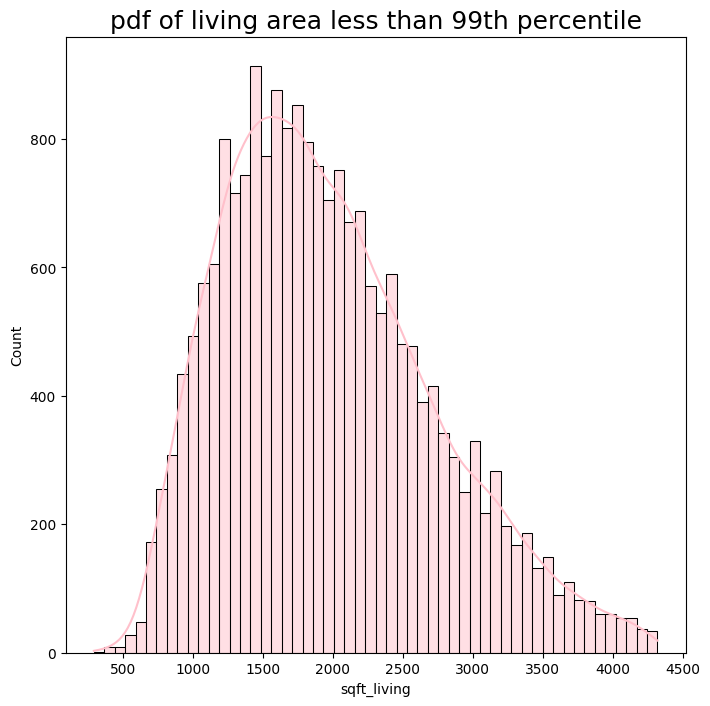

In [73]:
# We create a new variable to contain the observations in the 99th percentile, that is the most dramatic outliers.
plt.subplots(figsize=(8, 8))
p = data_2['sqft_living'].quantile(0.99)

data_3 = data_2[data_2['sqft_living']<p]

sns.histplot(data_3['sqft_living'], color='pink', kde=True)

plt.title('pdf of living area less than 99th percentile', size=18)
plt.show()

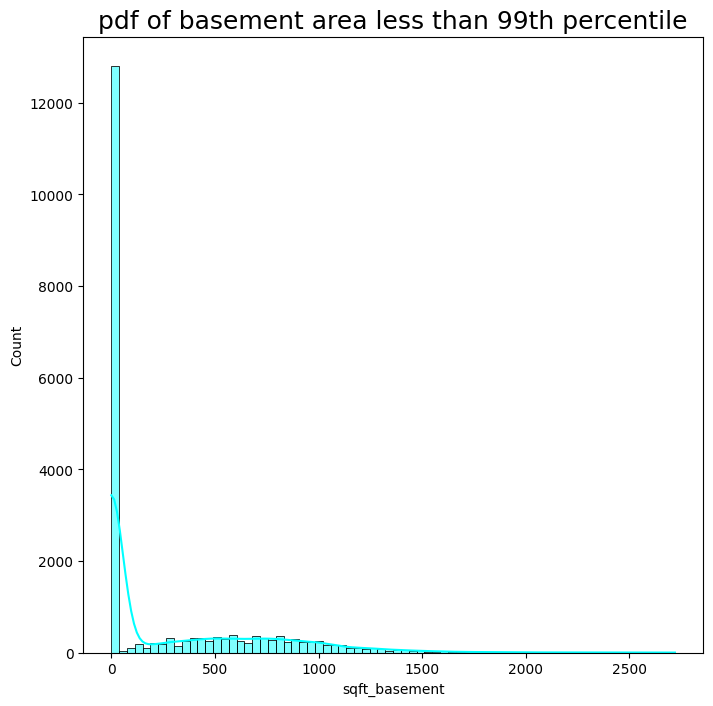

In [74]:
# We use a histogram to analyze the distribution of basement area for the observations in the 99th percentile.
plt.subplots(figsize=(8, 8))

sns.histplot(data_2['sqft_basement'], color='cyan', kde=True)

plt.title('pdf of basement area less than 99th percentile', size = 18)

plt.show()

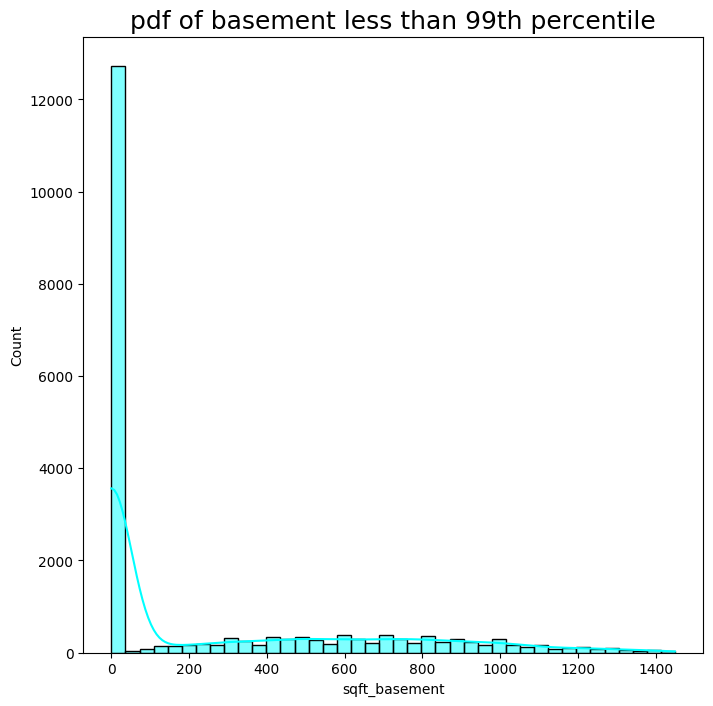

In [75]:
# We create a new variable to contain the observations in the 99th percentile, that is the most dramatic outliers.
plt.subplots(figsize=(8, 8))

p = data_3['sqft_basement'].quantile(0.99)
data_4 = data_3[data_3['sqft_basement']<p]
    
sns.histplot(data_4['sqft_basement'], color='cyan', kde=True)

plt.title('pdf of basement less than 99th percentile', size = 18)
plt.show()

### 4. Regression Model

### 4.1. New DataFrame

We reset the indices of the previous dataframe in order to make the process easier.

In [76]:
data_model = data_3.reset_index(drop=True)
data_model.describe(include="all")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold
count,2.047000e+04,20470.000000,20470.000000,20470.000000,2.047000e+04,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000
mean,4.883562e+05,3.293161,2.045005,1967.852907,1.431002e+04,1.477870,0.003859,0.185979,3.408842,7.549682,1704.848315,263.004592,1970.766878,77.206742,98078.617147,47.557825,-122.214246,1929.714558,12223.993649,6.579238
std,2.310955e+05,0.821262,0.696709,750.180672,3.898430e+04,0.537902,0.062005,0.669651,0.648919,1.054594,713.636971,400.713146,29.249119,384.865018,53.411527,0.140366,0.141924,619.016494,25174.626204,3.112189
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.462900,-122.330000,1470.000000,5040.000000,4.000000
50%,4.399900e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98065.000000,47.568350,-122.233000,1810.000000,7532.000000,6.000000
75%,6.100000e+05,4.000000,2.500000,2440.000000,1.030000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,510.000000,1996.000000,0.000000,98118.000000,47.679300,-122.124000,2290.000000,9883.000000,9.000000
max,1.399950e+06,5.000000,5.250000,4320.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,4310.000000,2160.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000,12.000000


### 4.2. Checking the Assumptings for the Ordinary Least Squares Method(For final project, see documentation).

We make sure that the assumptions of normality and multicollinearity aren't violated.

### 4.2.1. Normality by Logarithmic Transformation

In our previous analysis, we couldn't spot an obvious linear relationship between the living area and price. We convert the price using logarithms in order to linearize it.

In [77]:
#we can directly use the numpy method to convert all the price datapoints and store it a new variable.
log_price = np.log(data_model['price'])

#we store the new variable in a new column in the existing dataframe.
data_model['log_price'] = log_price

data_model.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,log_price
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,12.309982
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,13.195614
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,12.100712
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,13.311329
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,13.142166


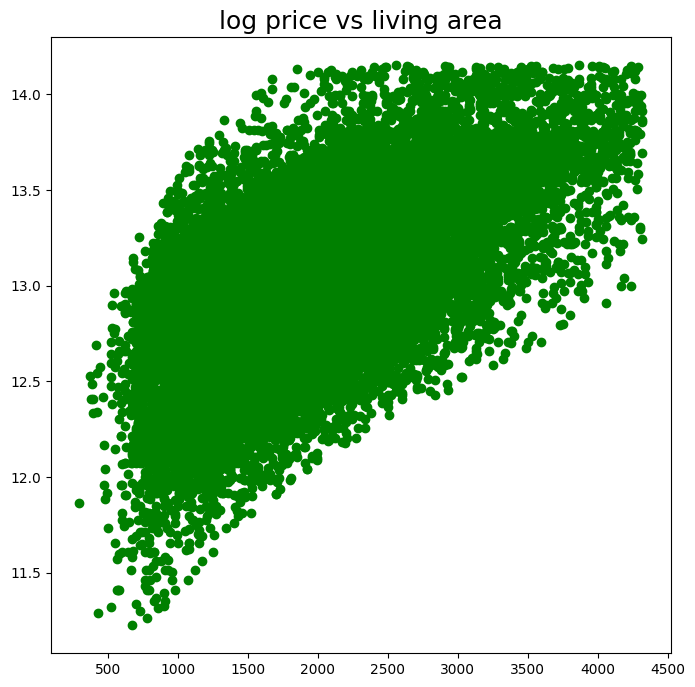

In [78]:
# We use a scatterplot to analyze the relationship between price and living area for the observations in the 99th percentile.
plt.subplots(figsize=(8, 8))

y = data_model['log_price']
x = data_model['sqft_living']

plt.scatter(x, y, color='green')

plt.title('log price vs living area', size=18)
plt.show()

As evident, the relationship is now much clearer and easier to interpret.

### 4.2.2. Multicollinearity Using Variable Influence Factor

This tells us how much the behavior of a variable is influenced by the other variables. We will use it in tandem with the heatmap to identify multicollinearity.

In [79]:
data_model.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'month_sold', 'log_price'],
      dtype=object)

In [80]:
# Drop 'sqft_living' because it is the sum of 'sqft_above' and 'sqft_basement'
variables_reduced = data_model.drop(['sqft_living'], axis=1)

# Re-run the VIF calculation on the remaining columns
# (Ensure you are using the 'add_constant' method mentioned earlier for accuracy)
from statsmodels.tools.tools import add_constant
X = add_constant(variables_reduced[[
    'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 
    'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
    'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
    'sqft_living15', 'sqft_lot15'
]])

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
print(vif.sort_values("VIF", ascending=False))


             VIF       Features
0   4.601089e+06          const
9   4.808032e+00     sqft_above
2   3.022338e+00      bathrooms
8   2.894241e+00          grade
16  2.851974e+00  sqft_living15
11  2.507077e+00       yr_built
4   2.089505e+00         floors
10  2.037036e+00  sqft_basement
17  2.011995e+00     sqft_lot15
3   1.968403e+00       sqft_lot
15  1.838634e+00           long
1   1.702648e+00       bedrooms
13  1.668163e+00        zipcode
6   1.278150e+00           view
7   1.251000e+00      condition
14  1.190942e+00            lat
12  1.142365e+00   yr_renovated
5   1.130823e+00     waterfront


In [81]:
vif

,VIF,Features
0,4.601089e+06,const
1,1.702648e+00,bedrooms
2,3.022338e+00,bathrooms
3,1.968403e+00,sqft_lot
4,2.089505e+00,floors
5,1.130823e+00,waterfront
6,1.278150e+00,view
7,1.251000e+00,condition
8,2.894241e+00,grade
9,4.808032e+00,sqft_above


The vif for some values is extremely high, more some being infinity! We recall that some variables related to area were extremely correlated. We drop those variables.

In [82]:
data_cleaned = data_model.drop(['sqft_living15', 'sqft_lot15', 'sqft_above', 'sqft_lot', 'sqft_basement'], axis=1)
data_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,month_sold,log_price
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,10,12.309982
1,538000.0,3,2.25,2570,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,12,13.195614
2,180000.0,2,1.00,770,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2,12.100712
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,12,13.311329
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,2,13.142166


In [83]:
data_cleaned.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'month_sold',
       'log_price'], dtype=object)

### 4.3. Building the Model

In [84]:
#In the above equation, x1 is x or the values taken by the x variable and y is the values taken by the y variable.

x1 = data_cleaned[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
        'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long']]

y = data_cleaned[['log_price']]

### 4.4. Is the Model Significant?

We fit the model using the appropriate Ordinary Least Squares method that comes with the statsmodels.api package.

In [85]:
#again, this method is pre-existing and can be directly used. The citation can be found in the documentation.

#this is b0. We are essentially adding a coulmn consisting of only 1s that is equal in length to the y variable.
x = sm.add_constant(x1)

#we fit the regression model on x and y using the appropriate method and store it in a variable.
results = sm.OLS(y,x).fit()

#we summarize our findings.
results.summary()

#note that there is a variable to represent the error in the image. In statistical terms it is the SSE. In easier words, we are trying to minimize the error. The lower the error, the better our model is.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     4013.
Date:                Tue, 17 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:07:14   Log-Likelihood:                -348.30
No. Observations:               20470   AIC:                             724.6
Df Residuals:                   20456   BIC:                             835.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.2383      3.547      1.477      0.140      -1.715      12.191
bedrooms        -0.0190      0.003     -6.976      0.000      -0.024      -0.014
bathrooms        0.0660      0.004     15.687      0.000       0.058       0.074
sqft_living      0.0002   4.35e-06     45.742      0.000       0.000       0.000
floors           0.0655      0.004     16.039      0.000       0.058       0.074
waterfront       0.3066      0.029     10.399      0.000       0.249       0.364
view             0.0722      0.003     25.390      0.000       0.067       0.078
condition        0.0576      0.003     19.524      0.000       0.052       0.063
grade            0.1648      0.003     62.651      0.000       0.160       0.170
yr_built        -0.0035    9.3e-05    -37.620      0.000      -0.004      -0.003
yr_renovated  2.173e-05   4.77e-06      4.560      0.000    1.24e-05    3.11e-05
zipcode         -0.0006   4.14e-05    -14.143      0.000      -0.001      -0.001
lat              1.3865      0.013    104.944      0.000       1.361       1.412
long            -0.0334      0.016     -2.141      0.032      -0.064      -0.003
==============================================================================
Omnibus:                      349.344   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              707.000
Skew:                          -0.027   Prob(JB):                    3.00e-154
Kurtosis:                       3.909   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Just creating a model is not enough. We have to gauge the significance of the model by looking at summary table.(For the final project, see documentation for more inforamtion)

1. R-squared: It tells us how close the data is to the fitted line.It is pretty close at around 74%.

2. Adjusted R-squared: It penalizes us for adding variables that have no explanatory power. Looks like it has passed this test too.

3. F-statistic: It tells us if the F-distribution is followed. The higher the value, the better.

4. P-value:It tells us the lowest value at which the null hypothesis can be rejected. Here the null hypothesis is that the dependent variables don't have any explanatory power.The lowest value is 0.05. This test is also passed.

### 4.5. Regression Model

Although our last model was pretty significant, we can still achieve a better result by trying to eliminate more correlation. On repeated trials, we can drop the following variables:

In [86]:
data_reg = data_model.drop(['long', 'yr_renovated'], axis=1)
data_reg.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,sqft_living15,sqft_lot15,month_sold,log_price
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,1340,5650,10,12.309982
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,1690,7639,12,13.195614
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,2720,8062,2,12.100712
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,1360,5000,12,13.311329
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,1800,7503,2,13.142166


In [87]:
x1 = data_cleaned[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
        'yr_built', 'lat','zipcode']]
y = data_cleaned[['log_price']]

In [88]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     4735.
Date:                Tue, 17 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:07:14   Log-Likelihood:                -360.68
No. Observations:               20470   AIC:                             745.4
Df Residuals:                   20458   BIC:                             840.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.2272      3.544      1.757      0.079      -0.719      13.173
bedrooms       -0.0192      0.003     -7.069      0.000      -0.025      -0.014
bathrooms       0.0692      0.004     16.635      0.000       0.061       0.077
sqft_living     0.0002   4.28e-06     46.063      0.000       0.000       0.000
floors          0.0668      0.004     16.385      0.000       0.059       0.075
waterfront      0.3164      0.029     10.747      0.000       0.259       0.374
view            0.0726      0.003     25.545      0.000       0.067       0.078
condition       0.0556      0.003     19.093      0.000       0.050       0.061
grade           0.1655      0.003     63.143      0.000       0.160       0.171
yr_built       -0.0037    8.6e-05    -42.679      0.000      -0.004      -0.004
lat             1.3827      0.013    104.810      0.000       1.357       1.409
zipcode        -0.0005   3.65e-05    -15.023      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      355.335   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.989
Skew:                          -0.024   Prob(JB):                    3.72e-158
Kurtosis:                       3.921   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model is more statistically significant because without dropping the R-squared much and keeping the adjusted R-squared the same, the F-statistic has increased significantly and the p-value is 0 now.
We still have a warning about strong multicollinearity. This is because certain variables like the number of bedrooms and bathrooms are although not very strongly correlated with the livng area, still have a non-negligible correaltion. Despite this, dropping them would significantly reduce the R-squared or the explanatory power. We have to keep in mind that no model can fully capture the dataset(If it does so, we might have an overfitting model). We can therefore adopt the model at the accuracy level of 74%.

### 5. Predictions

### 5.1. Predicting Prices

For the OLS Method, we had added a constant,'x' which was equal in size to all the other x1 variables

In [89]:
#the first column displays the constant that we added earlier.
x

,const,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,lat,zipcode
0,1.0,3,1.00,1180,1.0,0,0,3,7,1955,47.5112,98178
1,1.0,3,2.25,2570,2.0,0,0,3,7,1951,47.7210,98125
2,1.0,2,1.00,770,1.0,0,0,3,6,1933,47.7379,98028
3,1.0,4,3.00,1960,1.0,0,0,5,7,1965,47.5208,98136
4,1.0,3,2.00,1680,1.0,0,0,3,8,1987,47.6168,98074
...,...,...,...,...,...,...,...,...,...,...,...,...
20465,1.0,3,2.50,1530,3.0,0,0,3,8,2009,47.6993,98103
20466,1.0,4,2.50,2310,2.0,0,0,3,8,2014,47.5107,98146
20467,1.0,2,0.75,1020,2.0,0,0,3,7,2009,47.5944,98144
20468,1.0,3,2.50,1600,2.0,0,0,3,8,2004,47.5345,98027


### 5.2. New Dataframe

We create a new dataframe in order to predict the prices using some other variables.

In [90]:
#we create a new dataframe with some observations.
data_with_predictions = pd.DataFrame({'const':1, 'bedrooms':[3,3], 'bathrooms':[1,2.25], 'sqft_living':[1180,2570], 'floors':[1,2], 'waterfront':[0,0], 'view':[0,0],'condition':[3,3], 'grade':[7,7], 'yr_built':[1955,1951], 'lat':[47.5112,47.7210], 'zipcode':[98103,98002]})

#we name the columns and display it.
data_with_predictions = data_with_predictions[['const', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'lat', 'zipcode']]

data_with_predictions

,const,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,lat,zipcode
0,1,3,1.00,1180,1,0,0,3,7,1955,47.5112,98103
1,1,3,2.25,2570,2,0,0,3,7,1951,47.7210,98002


The regression lies in the 'results' method. We will fit the dataframe using this method and add it to our existing dataframe.

In [91]:
predictions = results.predict(data_with_predictions)
predictions

0    12.590405
1    13.377891
dtype: float64

In [92]:
#we store the predictions in a new variable and attach it to the dataframe
data_with_predictions['predictions'] = predictions
data_with_predictions

,const,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,lat,zipcode,predictions
0,1,3,1.00,1180,1,0,0,3,7,1955,47.5112,98103,12.590405
1,1,3,2.25,2570,2,0,0,3,7,1951,47.7210,98002,13.377891


### 5.3. Exponential Transformation

We take the exponent of the prices which is still in logarithms and store it in the dataframe.

In [93]:
#using the inbuilt numpy method we take the exponent(inverse of logarthim)of the logarithmic price to get the original prices that we are interested in.
pred_price = np.exp(data_with_predictions['predictions'])

pred_price

0    293726.740318
1    645571.523905
Name: predictions, dtype: float64

### 5.4. Final Prediction

In [94]:
#again we store it in a new variable and attach it to the dataset.
data_with_predictions['predicted_price'] = pred_price
data_with_predictions

,const,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,lat,zipcode,predictions,predicted_price
0,1,3,1.00,1180,1,0,0,3,7,1955,47.5112,98103,12.590405,293726.740318
1,1,3,2.25,2570,2,0,0,3,7,1951,47.7210,98002,13.377891,645571.523905


5.5.Remarks

The new dataframe is actually the first two observations of the orginal dataset.

The first prediction is within 31% of the observed value.

The second prediction is at around 20% from the observed value.

The combined prediciton is within 27% of the the observed values, our R-squared it at around 25%.

### 6. Conclusion

Overall, the exploration of housing prices in King County reveals a complex interplay of various factors that contribute to pricing. The analysis highlights the importance of using multiple variables to understand price variation better and the need to account for outliers when interpreting the data. This project aims to provide valuable insights for potential buyers, realtors, and builders, facilitating informed decisions in a competitive housing market. Further research could delve deeper into specific neighborhoods or demographic trends to enhance these findings and provide even more tailored insights.